In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


In [6]:
data=pd.read_csv("/content/Churn_Modelling.csv")
print(data.shape)
print(data.columns.tolist())
print(data.head())


(10000, 14)
['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']
   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82           

In [7]:
X=data.drop(columns=['RowNumber','CustomerId','Surname','Exited'])
y=data['Exited']
print("X shape",X.shape, "Y shape" , y.shape)
print(X.dtypes.value_counts())

X shape (10000, 10) Y shape (10000,)
int64      6
object     2
float64    2
Name: count, dtype: int64


In [8]:
le_geo=LabelEncoder()
le_gender=LabelEncoder()
X['Geography']=le_geo.fit_transform(X['Geography'])
X['Gender']=le_gender.fit_transform(X['Gender'])
print(X[['Geography','Gender']].head())

   Geography  Gender
0          0       0
1          2       0
2          0       0
3          0       0
4          2       0


In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42, stratify=y)
print("Train:", X_train ,"Test:", X_test)

Train:       CreditScore  Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
2151          753          0       1   57       7       0.00              1   
8392          739          1       1   32       3  102128.27              1   
5006          755          1       0   37       0  113865.23              2   
4117          561          0       1   37       5       0.00              2   
7182          692          1       1   49       6  110540.43              2   
...           ...        ...     ...  ...     ...        ...            ...   
4555          688          2       0   35       6       0.00              1   
4644          712          2       1   74       5       0.00              2   
8942          667          0       0   37       9   71786.90              2   
2935          687          2       1   35       8  100988.39              2   
6206          802          2       1   51       7       0.00              1   

      HasCrCard  IsActiveMember  EstimatedSa

In [10]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
print("X_train mean (First 3) :",X_train.mean(axis=0)[:3])
print("X_train std (First 3) :",X_train.std(axis=0)[:3])

X_train mean (First 3) : [-5.72875081e-16 -5.40678613e-17  7.10542736e-17]
X_train std (First 3) : [1. 1. 1.]


In [11]:
model=Sequential([
    Dense(16,activation='relu',input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(8,activation='relu'),
    Dense(1,activation='sigmoid')
])
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 321 (1.25 KB)

 Trainable params: 321 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
history=model.fit(X_train,y_train,epochs=10,batch_size=32,validation_split=0.2,verbose=1)

Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7518 - loss: 0.5900 - val_accuracy: 0.8000 - val_loss: 0.4804
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7953 - loss: 0.4855 - val_accuracy: 0.8000 - val_loss: 0.4505
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8016 - loss: 0.4470 - val_accuracy: 0.8000 - val_loss: 0.4392
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7946 - loss: 0.4484 - val_accuracy: 0.8069 - val_loss: 0.4313
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7963 - loss: 0.4417 - val_accuracy: 0.8206 - val_loss: 0.4214
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8139 - loss: 0.4252 - val_accuracy: 0.8306 - val_loss: 0.4168
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8109 - loss: 0.4266 - val_accuracy: 0.8344 - val_loss: 0.4120
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8100 - loss: 0.4294 - val_accuracy: 0.

In [13]:
# Predict on test set (probabilities → binary)
y_prob = model.predict(X_test)
y_pred = (y_prob > 0.5).astype(int).reshape(-1)

acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Test Accuracy:", round(acc, 4))
print("Confusion Matrix:\n", cm)


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Test Accuracy: 0.83
Confusion Matrix:
 [[1572   21]
 [ 319   88]]


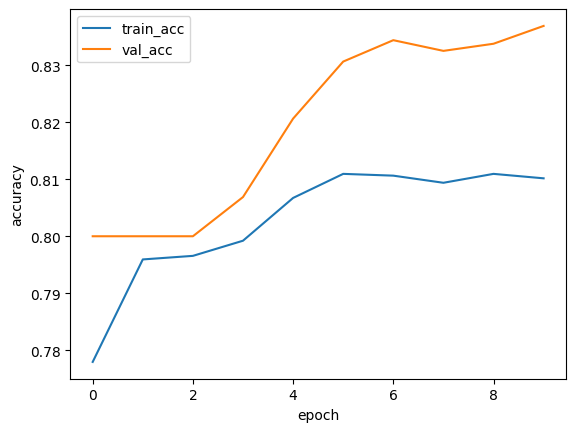

In [14]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.xlabel('epoch'); plt.ylabel('accuracy'); plt.legend(); plt.show()
